# **Mechanizm reakcji enzymatycznych** - model kinetyczny - prosty, z jednym substratem, hiperboliczny


$$
\text{S} + \text{E} \leftrightarrow \text{ES} \rightarrow \text{P} + \text{E}
$$

Trzy " reakcje elementarne"

$$
1)\ \text{S} + \text{E} \rightarrow \text{ES}, k_1\\
2)\ \text{ES} \rightarrow \text{S} + \text{E}, k_{-1}\\
3)\ \text{ES} \rightarrow \text{P} + \text{E}, k_2
$$

Cztery indywidua chemicznye $S, E, ES, P$

Model = układ czterech równań różniczkowych opisujących zmiany stężenia w czasie:

$$
\frac{d[S]}{dt} = -k_1[S][E] + k_{-1}[ES]\\
\frac{d[E]}{dt} = -k_1[S][E] + k_{-1}[ES] + k_2[ES]\\
\frac{d[ES]}{dt} = k_1[S][E] - k_{-1}[ES] - k_2[ES] \\
\frac{d[P]}{dt} = k_2[ES]
$$

Można założyć, że w stanie stacjonarnym stężenie kompleksu $ES$ jest stałe w czasie, zatem:
$$
\frac{d[ES]}{dt} = 0\\
$$
i pamiętając, że całkowite stężenie enzymu wynosi: \\
$$[E]_0 = [E] + [ES]$$ i $$[S]>>[E]_0$$
Po przekształceniach dostaje się równianie: \\
$$
v_0 = \frac{d[P]}{dt} = \frac{k_1k_2[E]_0[S]}{k_1[S]+k_{-1}+k_2}
$$
wyrażające zależność początkowej szybkości reakcji enzymatycznej w stanie stacjonarnym od początkowego stężenia substratu.

Przyjmując, że:
$$
V_{max} = k_2[E]_0
$$
oraz
$$
K_m = \frac{k_{-1}+k_2}{k_1}\ \ \textrm{- wariant Briggsa-Haldane}
$$
otrzymujemy:
$$
v_0 = \frac{V_{max}[S]_0}{[S]_0+K_m}
$$
zwane potocznie równaniem Michaelisa-Menten.

Km= 2.0
Vmax= 5e-05


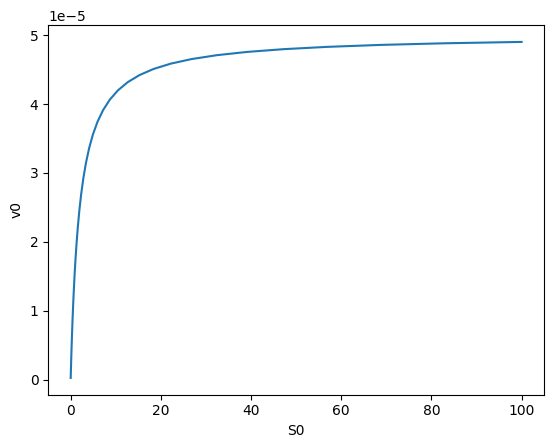

In [2]:
import matplotlib.pyplot as plt
import numpy as np

k1 = 1
k2 = 1
k3 = 1

Km = (k2+k3)/k1
Vmax = k3*E0
print("Km=",Km)
print("Vmax=",Vmax)

S0 = np.logspace(-2,2) # od 1e-2 do 1e2
v0 = Vmax*S0/(S0+Km)
plt.plot(S0, v0)
plt.xlabel('S0')
plt.ylabel('v0')
plt.show()


Km= 2.0
Vmax= 5e-05


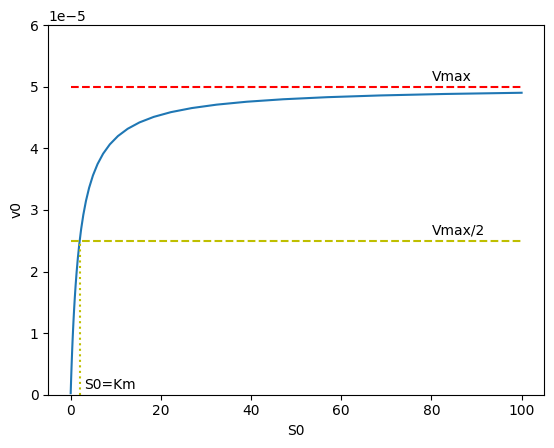

In [3]:
import matplotlib.pyplot as plt
import numpy as np

k1 = 1
k2 = 1
k3 = 1

Km = (k2+k3)/k1
Vmax = k3*E0
print("Km=",Km)
print("Vmax=",Vmax)

S0 = np.logspace(-2,2)
v0 = Vmax*S0/(S0+Km)
plt.plot(S0, v0)
plt.plot((S0.min(), S0.max()),(Vmax, Vmax), 'r--')
plt.plot((S0.min(), S0.max()),(Vmax/2, Vmax/2), 'y--')
plt.plot((Km, Km),(0,Vmax/2),'y:')
plt.xlabel('S0')
plt.ylabel('v0')
plt.text(Km+1,0+1e-6,"S0=Km")
plt.text(80,Vmax/2+1e-6,"Vmax/2")
plt.text(80,Vmax+1e-6,"Vmax")
plt.ylim(0,6e-5)
plt.show()


### Model - bez uproszczeń, całkowanie numeryczne układu równań różczniczkowych

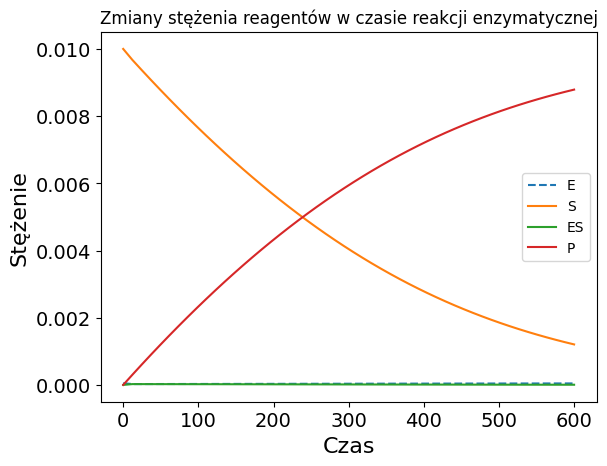

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# E + S <-> ES, k1, k2
# ES -> E + P, k3

def model(y, t):
    E = y[0]
    S = y[1]
    ES = y[2]
    P = y[3]

    dSdt = -k1*E*S + k2*ES
    dEdt = -k1*E*S + k2*ES + k3*ES
    dESdt = k1*E*S - k2*ES - k3*ES
    dPdt = k3*ES
    return [dEdt, dSdt, dESdt, dPdt]


# stałe szybkości
k1 = 1e5
k2 = 1e3
k3 = 1

#stężenie początkowe substratu i enzymu
S0 = 0.01
E0 = 0.00005

ic = [E0, S0, 0, 0]
t = np.linspace(0,600)
results = odeint( model, ic, t)
E = results[:,0]
S = results[:,1]
ES = results[:,2]
P = results[:,3]



plt.title('Zmiany stężenia reagentów w czasie reakcji enzymatycznej')
plt.plot(t, E, '--', color='C0', label='E')
plt.plot(t, S, color='C1', label='S')
plt.plot(t, ES,  color='C2', label='ES')
plt.plot(t, P,  color='C3', label='P')
plt.xlabel('Czas',fontsize=16)
plt.ylabel('Stężenie',fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show()


### Jakie wartości podczas reakcji ma stężenie E i kompleksu aktywnego ES?

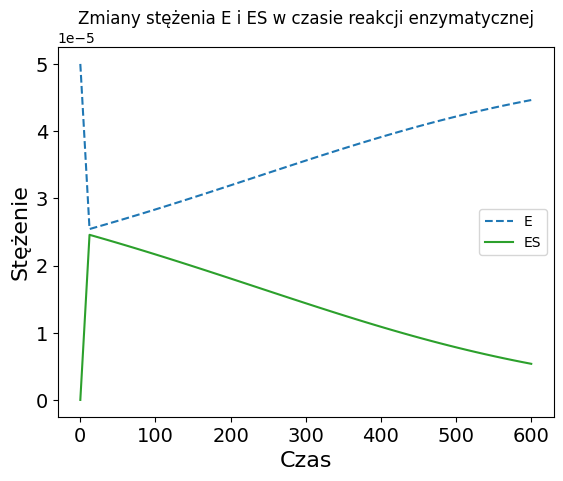

In [23]:
plt.title('Zmiany stężenia E i ES w czasie reakcji enzymatycznej')
plt.plot(t, E, '--', color='C0', label='E')
#plt.plot(t, S, color='C1', label='S')
plt.plot(t, ES,  color='C2', label='ES')
#plt.plot(t, P,  color='C3', label='P')
plt.xlabel('Czas',fontsize=16)
plt.ylabel('Stężenie',fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show()

### Obliczanie/wyznaczanie szybkości początkowej (względem produktu)

In [27]:
print(t)
print(P)

[  0.          12.24489796  24.48979592  36.73469388  48.97959184
  61.2244898   73.46938776  85.71428571  97.95918367 110.20408163
 122.44897959 134.69387755 146.93877551 159.18367347 171.42857143
 183.67346939 195.91836735 208.16326531 220.40816327 232.65306122
 244.89795918 257.14285714 269.3877551  281.63265306 293.87755102
 306.12244898 318.36734694 330.6122449  342.85714286 355.10204082
 367.34693878 379.59183673 391.83673469 404.08163265 416.32653061
 428.57142857 440.81632653 453.06122449 465.30612245 477.55102041
 489.79591837 502.04081633 514.28571429 526.53061224 538.7755102
 551.02040816 563.26530612 575.51020408 587.75510204 600.        ]
[0.         0.00030322 0.00060169 0.00089534 0.0011841  0.00146792
 0.00174671 0.00202043 0.002289   0.00255238 0.00281051 0.00306335
 0.00331085 0.00355296 0.00378965 0.00402089 0.00424664 0.0044669
 0.00468164 0.00489084 0.00509452 0.00529266 0.00548527 0.00567237
 0.00585398 0.00603012 0.00620083 0.00636614 0.0065261  0.00668076
 0.006

In [30]:
print("t=",t[0], "[P]=",P[0])
print("t=",t[1], "[P]=",P[1])
v0 = (P[1]-P[0])/(t[1]-t[0])
print("v0=",v0)

t= 0.0 [P]= 0.0
t= 12.244897959183673 [P]= 0.00030321566031276347
v0= 2.4762612258875683e-05


In [43]:
Km = (k2+k3)/k1
Vmax = k3*E0
eff = k2/Km
print("Km=",Km)
print("Vmax=",Vmax)
print("eff=",eff)
print(E+ES) # bilans enzymu [E]0


Km= 0.01001
Vmax= 5e-05
eff= 99900.0999000999
[5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05
 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05
 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05
 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05
 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05 5.e-05]


# Wyznaczanie parametrów Michaelisa-Menten

### Dopasowanie nieliniowe

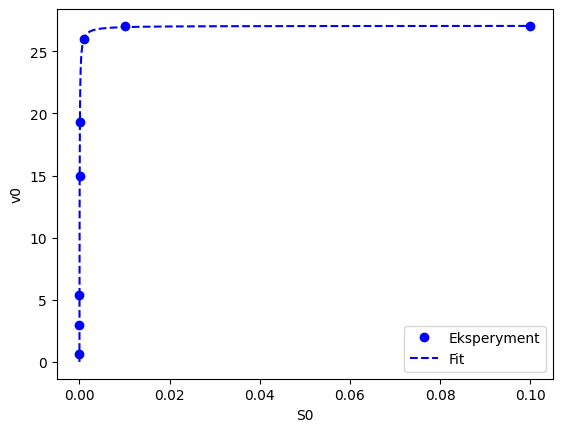

Wyniki obliczeń metodą regresji nieliniowej - Km: 4.02e-05 Vmax: 2.71e+01


In [52]:

# Początkowe stężenie substratu, umol
S0 = np.array([1e-1, 1e-2, 1e-3, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6])
# Szybkość początkowa umol/min
v0 = np.array([27, 27, 26, 19.3, 15, 5.4, 3, 0.66])

# M-M
def model(S, Km, Vmax):
  return (Vmax*S)/(Km+S)


popt, pcov = curve_fit(model, S0, v0)
Km, Vmax = popt

x = np.linspace(1e-9, 0.1,1000000)
y = model(x, Km, Vmax)

plt.plot(S0,v0,'bo', label='Eksperyment')
plt.plot(x,y,'b--', label='Fit')
plt.xlabel('S0')
plt.ylabel('v0')
plt.legend()
plt.show()

print("Wyniki obliczeń metodą regresji nieliniowej - Km: {:.2e} Vmax: {:.2e}".format(Km, Vmax))

### Dopasowanie liniowe (metoda Lineweave-Burka)

Równanie Miechaelisa-Menten w fromie zlinearyzowanej:

$$
\frac{1}{v_0} = \frac{K_m}{V_{max}}\frac{1}{[S]_0}+\frac{1}{V_{max}}\\
$$

czyli:

$$
y =  ax+b \\
a = \frac{K_m}{V_{max}},\ b = \frac{1}{V_{max}}
$$

a zatem:

$$
V_{max} = \frac{1}{b}\\
K_m = \frac{a}{b}
$$


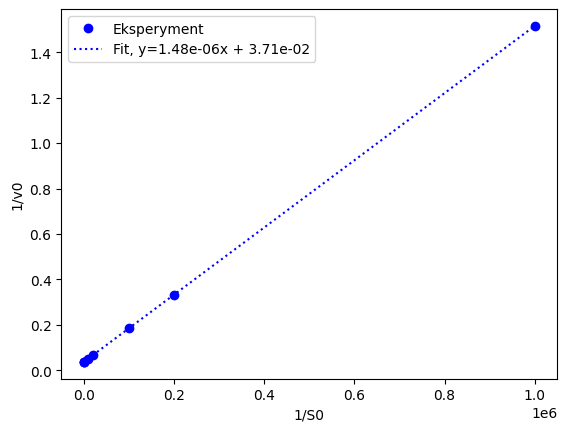

Wyniki obliczeń metodą L-B - Km: 3.98e-05 Vmax: 2.69e+01


In [54]:
from scipy import stats


# Odwrotności [S] i v (dla wykresu Lineweavera-Burka)
inv_S0 = 1 / S0
inv_v0 = 1 / v0
a, b, r_value0, p_value0, std_err0 = stats.linregress(inv_S0, inv_v0)
plt.plot(inv_S0, inv_v0, 'bo', label='Eksperyment')
plt.plot(inv_S0, a*inv_S0 + b, 'b:', label=f'Fit, y={a:.2e}x + {b:.2e}')
plt.xlabel('1/S0')
plt.ylabel('1/v0')
plt.legend()
plt.show()

Vmax = 1 / b
Km = a/b
print(f"Wyniki obliczeń metodą L-B - Km: {Km:.2e} Vmax: {Vmax:.2e}")

In [63]:
class Enzym:
  def __init__(self, k1, k2, k3):
    self.k1 = k1
    self.k2 = k2
    self.k3 = k3
    self.Km = (k2+k3)/k1
    self.Vmax = k3*E0
    self.E = None
    self.S = None
    self.ES = None
    self.P = None

  def model(self, y, t):
    E = y[0]
    S = y[1]
    ES = y[2]
    P = y[3]
    dSdt = -self.k1*E*S + self.k2*ES
    dEdt = -self.k1*E*S + self.k2*ES + self.k3*ES
    dESdt = self.k1*E*S - self.k2*ES - self.k3*ES
    dPdt = self.k3*ES
    return [dEdt, dSdt, dESdt, dPdt]

  def symuluj(self, E0, S0, t_end):
    ic = [E0, S0, 0, 0] # E0, S0, ES0, P0
    t = np.linspace(0,t_end)
    results = odeint( self.model, ic, t)
    self.E = results[:,0]
    self.S = results[:,1]
    self.ES = results[:,2]
    self.P = results[:,3]
    self.t=t


2.0


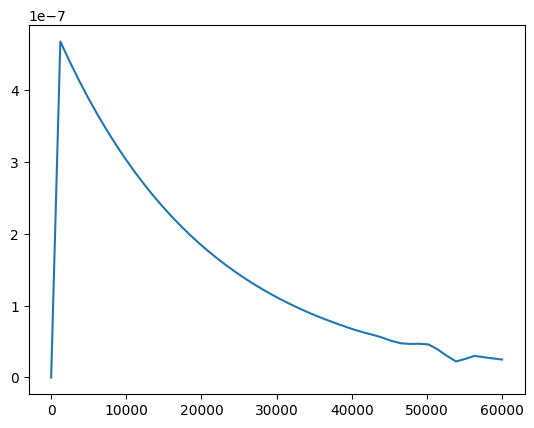

In [72]:
e1 = Enzym(1,1,1) # k1, k2, k3
print(e1.Km)
e1.symuluj(1e-4, 1e-2, 60000) # E0, S0, czas reakcji
plt.plot(e1.t, e1.ES)

**Zadanie 1.** Opracować model kinetyczny reakcji enzymatycznej, uwzględniający dezaktywację termiczną enzymu

**Zadanie 2.** pracować model kinetyczny reakcji enzymatycznej, inhibitowanej substratem (patrz inwertaza)